# Sound Waves

Let's introduce the fundamental characteristics of sound waves, explaining key properties such as frequency, period, and amplitude and wavelength.

## Sine Wave Function

A **discrete-time sine wave**, described by the formula:

$$
y[n] = A \cdot \sin(2\pi f t_n)
$$

where:
- $n$ is the sample index (0, 1, 2, ...)
- $A$ is the maximum amplitude
- $f$ is the frequency in Hz
- $f_s$ = 44100 Hz is the sampling frequency
- $t_n = n/f_s$ are the discrete time instants

## Frequency

**Frequency** ($f$) describes how often a repeating event, such as a sound wave cycle, occurs each second.
In the case of sound waves, frequency measures the number of complete wave cycles that pass a fixed point per second, and its unit is Hertz (Hz).

```{note} 
The frequency is the inverse of the period ($T$), which is the time taken for one complete cycle. 
```

The mathematical relationship between frequency and period is shown below:

$$
f = \frac{1}{T}
$$

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Parameters
A = 1        # Amplitude
fs = 1000    # Sampling frequency in Hz
duration = 1 # Duration in seconds to plot

# Frequency range
min_freq = 0.5
max_freq = 20
freq_steps = 40
freqs = np.linspace(min_freq, max_freq, freq_steps)

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate sine waves for each frequency
sines = []
for f in freqs:
    sines.append(A * np.sin(2 * np.pi * f * t))

# Build frames for the animation/slider
frames = [
    go.Frame(
        data=[
            go.Scatter(
                x=t, 
                y=sines[i],
                mode="lines",
                name=f"f = {freqs[i]:.2f} Hz"
            )
        ],
        name=str(i)
    )
    for i in range(len(freqs))
]

# Initial trace (for initial_freq = 1 Hz)
init_idx = np.argmin(np.abs(freqs - 1))
fig = go.Figure(
    data=[
        go.Scatter(
            x=t, 
            y=sines[init_idx],
            mode="lines",
            name=f"f = {freqs[init_idx]:.2f} Hz"
        )
    ],
    frames=frames
)

# Slider definition
steps = []
for i, f in enumerate(freqs):
    step = dict(
        method="animate",
        args=[
            [str(i)],
            {"mode": "immediate", "frame": {"duration": 0, "redraw": True}, "transition": {"duration": 0}}
        ],
        label=f"{f:.2f} Hz"
    )
    steps.append(step)

sliders = [dict(
    active=init_idx,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 20},
    steps=steps
)]

fig.update_layout(
    title="Visualize Frequency Increases",
    xaxis_title="Time (seconds)",
    yaxis_title="Amplitude",
    sliders=sliders,
    height=250,
    template='plotly_white',
    margin=dict(l=30, r=15, t=40, b=40)
)

fig.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 308


## Period

The **period** ($T$) of a sound wave is the amount of time it takes for one complete cycle of the wave to occur.
It is measured in seconds. A shorter period means the wave cycles faster, while a longer period means it cycles more slowly.

$$
T = \frac{1}{f}
$$

## Amplitude

**Amplitude** is the maximum value that a wave reaches from its equilibrium (center) position. In the context of a sine wave, amplitude determines how "tall" the oscillations are.

- A larger $A$ means the wave peaks and troughs are farther from zero, making the wave "louder" if it represents sound.
- Amplitude does **not** affect the frequency (how fast the wave oscillates), only how high or low the wave goes.

:::{note}
In audio, amplitude relates to perceived volume: **higher amplitude** means a **louder sound**, and **lower amplitude** means a **quieter sound**.
:::

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Parameters
f = 3        # Frequency in Hz
fs = 1000    # Sampling frequency in Hz
duration = 1 # Duration in seconds to plot

# Amplitude range
min_amp = 0.
max_amp = 1
amp_steps = 40
amplitudes = np.linspace(min_amp, max_amp, amp_steps)

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate sine waves for each amplitude
sines = []
for A in amplitudes:
    sines.append(A * np.sin(2 * np.pi * f * t))

# Build frames for the animation/slider
frames = [
    go.Frame(
        data=[
            go.Scatter(
                x=t,
                y=sines[i],
                mode="lines",
                name=f"A = {amplitudes[i]:.2f}"
            )
        ],
        name=str(i)
    )
    for i in range(len(amplitudes))
]

# Initial trace (for initial_amp = 1)
init_idx = np.argmin(np.abs(amplitudes - 1))
fig = go.Figure(
    data=[
        go.Scatter(
            x=t, 
            y=sines[init_idx],
            mode="lines",
            name=f"A = {amplitudes[init_idx]:.2f}"
        )
    ],
    frames=frames
)

# Slider definition
steps = []
for i, A in enumerate(amplitudes):
    step = dict(
        method="animate",
        args=[
            [str(i)],
            {"mode": "immediate", "frame": {"duration": 0, "redraw": True}, "transition": {"duration": 0}}
        ],
        label=f"{A:.2f}"
    )
    steps.append(step)

sliders = [dict(
    active=init_idx,
    currentvalue={"prefix": "Amplitude: "},
    pad={"t": 20},
    steps=steps
)]

fig.update_layout(
    title="Visualize Amplitude Increases",
    xaxis_title="Time (seconds)",
    yaxis_title="Amplitude",
    sliders=sliders,
    height=450,
    template='plotly_white',
    margin=dict(l=30, r=15, t=40, b=40)
)

fig.show()

## Anatomy of a Sine Wave

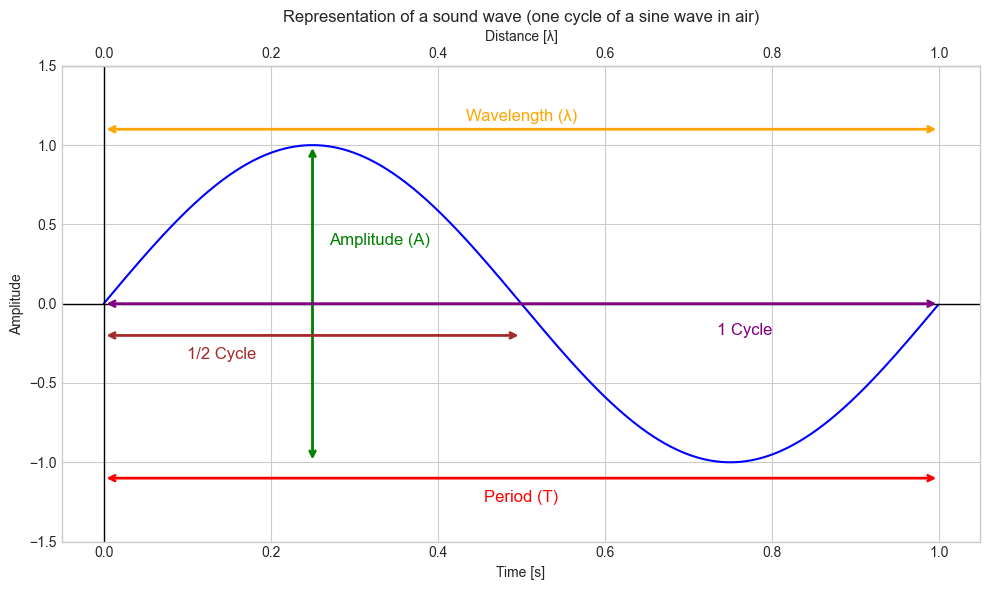

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.grid'] = True
np.random.seed(42)

# Define sine wave parameters
A = 1         # Amplitude
f = 1         # Frequency in Hz (1 cycle per second)
T = 1 / f     # Period (seconds per cycle)
λ = T         # Wavelength (assuming speed of wave = 1 unit/s)

# Time vector for one cycle
t = np.arange(0, T, 1/1000)
y = A * np.sin(2 * np.pi * f * t)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Time domain plot
ax.plot(t, y, 'b', label=r'$y(t) = A \sin(2\pi ft)$')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Representation of a sound wave (one cycle of a sine wave in air)')

# Add secondary x-axis for distance
secax = ax.secondary_xaxis('top', functions=(lambda x: x / λ, lambda x: x * λ))
secax.set_xlabel('Distance [λ]')

# Adjust y-limits to make space for annotations
ax.set_ylim(-1.5, 1.5)

# --- Annotations ---

# Amplitude annotation (Vertical arrow from -A to A)
ax.annotate('', xy=(T/4, A), xytext=(T/4, -A), 
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text(T/4 + 0.02, 0.4, 'Amplitude (A)', color='green', fontsize=12, va='center')

# Period annotation (Horizontal arrow BELOW the x-axis)
ax.annotate('', xy=(0, -1.1), xytext=(T, -1.1), 
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax.text(T/2, -1.25, 'Period (T)', color='red', fontsize=12, ha='center')

# Wavelength annotation (Horizontal arrow ABOVE the upper x-axis)
ax.annotate('', xy=(0, 1.1), xytext=(λ, 1.1), 
            arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
ax.text(λ/2, 1.15, 'Wavelength (λ)', color='orange', fontsize=12, ha='center')

# 1-cycle annotation (Horizontal arrow BELOW the period annotation)
ax.annotate('', xy=(0, 0), xytext=(T, 0), 
            arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
ax.text(0.8, -0.2, '1 Cycle', color='purple', fontsize=12, ha='right')

# Half-cycle annotation (Horizontal arrow BELOW the 1-cycle annotation)
ax.annotate('', xy=(0, -0.2), xytext=(T/2, -0.2), 
            arrowprops=dict(arrowstyle='<->', color='brown', lw=2))
ax.text(0.1, -0.35, '1/2 Cycle', color='brown', fontsize=12, ha='left')

# Formatting
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


## Wavelength

**Wavelength** is calculated using the speed of sound $ c_{air} = 343  m/s$ and the frequency of the sound wave. The relationship between wavelength and frequency is given by:

$$
\lambda = \frac{c_{air}}{f}
$$

where $c = 343$ m/s (speed of sound in air at 20°C)

## Convert Frequency and Wavelength

```{hint}
Use the calculator below to convert frequency to its corresponding wavelength in air: move the slider to select different frequencies and see the wavelength changing.
```

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create frequency range
freq_values = [
    20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 440, 500, 630,
    800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500,
    16000, 20000
]
c_air = 343  # Speed of sound in air (m/s)

# Create figure with slider
fig = go.Figure()

# Add initial trace for 440 Hz
initial_freq = 440
initial_wl = c_air / initial_freq

fig.add_trace(go.Indicator(
    mode="number+delta",
    value=initial_wl,
    # title={'text': f"Wavelength at {initial_freq} Hz"},
    domain={'x': [0, 1], 'y': [0.5, 1]},
    number={'suffix': " m", 'valueformat': ".3f"},
))

# Add waveform visualization
fig.add_trace(go.Scatter(
    x=np.linspace(0, 3, 300),
    y=np.sin(2 * np.pi * initial_freq / 1000 * np.linspace(0, 3, 300)),
    mode='lines',
    line=dict(color='#0066cc', width=2),
    name='Waveform',
    yaxis='y2'
))

# Create slider steps
steps = []
for freq in freq_values:
    wl = c_air / freq
    wl_cm = wl * 100
    
    step = dict(
        method="update",
        args=[
            {"y": [None, np.sin(2 * np.pi * freq / 1000 * np.linspace(0, 3, 300))],
             "value": [wl]},
            {"title.text": f"<b>Frequency:</b> {freq} Hz<br><b>Wavelength:</b> {wl:.3f} m ({wl_cm:.1f} cm)"}
        ],
        label=f"{freq} Hz"
    )
    steps.append(step)

sliders = [dict(
    active=freq_values.index(initial_freq),
    currentvalue={"prefix": "Frequency: ", "suffix": " Hz"},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title=f"<b>Frequency:</b> {initial_freq} Hz<br><b>Wavelength:</b> {initial_wl:.3f} m ({initial_wl*100:.1f} cm)",
    height=450,
    template='plotly_white',
    yaxis2=dict(
        domain=[0, 0.4],
        title='Amplitude',
        showgrid=True
    ),
    xaxis=dict(
        domain=[0, 1],
        title='Time (ms)',
        showgrid=True
    )
)

fig.show()

## Generate a Sine Wave and Listen to it

We will now generate a 2 seconds long sine wave and listen to it.

In [ ]:
from IPython.display import Audio, display

f = 440     # Frequency in Hz
A = 0.5       # Amplitude
fs = 44100  # Sampling frequency in Hz

t = np.arange(0, 2, 1/fs)
y = A * np.sin(2 * np.pi * f * t)

audio_signal = Audio(y, rate=fs)
display(audio_signal)
